<a href="https://colab.research.google.com/github/SafiUllahAdam/DataAnalysis-Bootcamp/blob/main/Finding_Suitable_PakistanCities_For_EUVisitors_Project_with_OpenWeatherAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Collection using OpenWeather API**

***Step1 : Data Gathering through Web SCraping - API ***


1. Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime


2. Creating Custom Dataset in CSV format to utilize in next stages with API

In [4]:
# Creating the dataset for 100 cities from Sindh, Punjab, KPK, and Balochistan
data = {
    'City': [
        # 25 cities from Sindh
        'Karachi', 'Hyderabad', 'Sukkur', 'Larkana', 'Mirpurkhas', 'Thatta', 'Jacobabad', 'Khairpur', 'Dadu', 'Nawabshah',
        'Shikarpur', 'Tando Adam', 'Tando Allahyar', 'Badin', 'Ghotki', 'Umerkot', 'Matiari', 'Shahdadkot', 'Sehwan', 'Kotri',
        'Hala', 'Kandhkot', 'Kashmore', 'Tando Muhammad Khan', 'Sanghar',
        # 25 cities from Punjab
        'Lahore', 'Rawalpindi', 'Multan', 'Faisalabad', 'Sialkot', 'Sargodha', 'Gujranwala', 'Bahawalpur', 'Dera Ghazi Khan', 'Sheikhupura',
        'Sahiwal', 'Jhelum', 'Mandi Bahauddin', 'Kasur', 'Vehari', 'Okara', 'Toba Tek Singh', 'Rahim Yar Khan', 'Narowal', 'Khushab',
        'Mianwali', 'Bhakkar', 'Attock', 'Chiniot', 'Pakpattan',
        # 25 cities from KPK
        'Peshawar', 'Mardan', 'Swat', 'Abbottabad', 'Kohat', 'Bannu', 'Dera Ismail Khan', 'Charsadda', 'Nowshera', 'Mingora',
        'Mansehra', 'Swabi', 'Haripur', 'Karak', 'Tank', 'Hangu', 'Batkhela', 'Lower Dir', 'Upper Dir', 'Timergara',
        'Buner', 'Lakki Marwat', 'Malakand', 'Shangla', 'Chitral',
        # 25 cities from Balochistan
        'Quetta', 'Gwadar', 'Khuzdar', 'Zhob', 'Turbat', 'Sibi', 'Dalbandin', 'Panjgur', 'Lasbela', 'Kalat',
        'Chaman', 'Nushki', 'Mastung', 'Awaran', 'Pasni', 'Loralai', 'Dera Bugti', 'Hub', 'Barkhan', 'Kharan',
        'Jiwani', 'Mach', 'Surab', 'Duki', 'Uthal'
    ],
    'Province': [
        # Provinces corresponding to the cities
        'Sindh'] * 25 + ['Punjab'] * 25 + ['Khyber Pakhtunkhwa'] * 25 + ['Balochistan'] * 25,
    'Country': ['Pakistan'] * 100  # Country is the same for all cities
}

# Creating DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('pakistan_cities.csv', index=False)

# Show the DataFrame
df.head(10)


,City,Province,Country
0,Karachi,Sindh,Pakistan
1,Hyderabad,Sindh,Pakistan
2,Sukkur,Sindh,Pakistan
3,Larkana,Sindh,Pakistan
4,Mirpurkhas,Sindh,Pakistan
5,Thatta,Sindh,Pakistan
6,Jacobabad,Sindh,Pakistan
7,Khairpur,Sindh,Pakistan
8,Dadu,Sindh,Pakistan
9,Nawabshah,Sindh,Pakistan


3. Downlaoding Dataset in Browser


In [5]:
from google.colab import files
files.download('pakistan_cities.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4. Now Uplaod The downloaded dataset in GDrive for next usage & Load it here on COlab from GDrive

In [6]:
import pandas as pd

# Load the CSV file into a DataFrame
cities = pd.read_csv('/content/pakistan_cities.csv')

# Display the first few rows of the DataFrame
print("First 10 rows of the DataFrame:")
print(cities.tail(10))


First 10 rows of the DataFrame:
          City     Province   Country
90     Loralai  Balochistan  Pakistan
91  Dera Bugti  Balochistan  Pakistan
92         Hub  Balochistan  Pakistan
93     Barkhan  Balochistan  Pakistan
94      Kharan  Balochistan  Pakistan
95      Jiwani  Balochistan  Pakistan
96        Mach  Balochistan  Pakistan
97       Surab  Balochistan  Pakistan
98        Duki  Balochistan  Pakistan
99       Uthal  Balochistan  Pakistan


5. Use the OpenWeather API to collect real-time weather data for cities in Pakistan.*italicized text*

In [7]:
import requests
import pandas as pd
from datetime import datetime

# Your API key
api_key = '50319c144aaee25c2be2eb081c009518'     #API Recieved on Email or We can paste it from "MY API KEYS" section

# Define an empty list to store the results
weather_data = []

# Loop through each city and its corresponding country in the DataFrame
for index, row in cities.iterrows():
    city = row['City']
    country = row['Country']  # Get the country from your CSV
    province = row['Province']
    # Construct the API request URL
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric'

    # Make the request to the API
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()  # Convert response to JSON format

        # Extract weather data
        temp = data['main']['temp']
        feels_like = data['main']['feels_like']
        temp_min = data['main']['temp_min']
        temp_max = data['main']['temp_max']
        humidity = data['main']['humidity']
        pressure = data['main']['pressure']
        wind_speed = data['wind']['speed']
        desc = data['weather'][0]['description']
        #country = data['sys']['country']
        clouds = data['clouds']['all']
        lon = data['coord']['lon']
        lat = data['coord']['lat']
        sunrise_unix = data['sys']['sunrise']
        sunset_unix = data['sys']['sunset']

        # Convert Unix timestamps to human-readable format
        sunrise = datetime.fromtimestamp(sunrise_unix).strftime('%I:%M %p')
        sunset = datetime.fromtimestamp(sunset_unix).strftime('%I:%M %p')

        # Append the data to the list
        weather_data.append({
            'Country': country,
            'Province':province,
            'City': city,
            'Temperature': temp,
            'Feels_Like': feels_like,
            'Min_Temp': temp_min,
            'Max_Temp': temp_max,
            'Humidity': humidity,
            'Pressure': pressure,
            'Wind_Speed': wind_speed,
            'Cloudiness': clouds,
            'Description': desc.capitalize(),
            'Longitude': lon,
            'Latitude': lat,
            'Sunrise': sunrise,
            'Sunset': sunset
        })

    else:
        # If the request fails, append an error message for that city
        weather_data.append({
            'City': city,
            'Error': f'Error fetching data: {response.status_code}'
        })

# Convert the list of weather data into a pandas DataFrame
weather_df = pd.DataFrame(weather_data)


6. Now Save this New DataFram into new CSV File

In [8]:
weather_df.to_csv('pakistan_weather_data.csv', index=False)

#Print the DataFrame

weather_df.head()

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset,Error
0,Pakistan,Sindh,Karachi,32.90,36.67,32.90,32.90,52.0,1006.0,4.63,40.0,Scattered clouds,67.0822,24.9056,01:18 AM,01:33 PM,NaN
1,Pakistan,Sindh,Hyderabad,30.23,32.09,30.23,31.73,54.0,1004.0,6.17,40.0,Scattered clouds,78.4744,17.3753,12:34 AM,12:46 PM,NaN
2,Pakistan,Sindh,Sukkur,38.66,38.92,38.66,38.66,25.0,1003.0,2.77,0.0,Clear sky,68.8574,27.7052,01:10 AM,01:27 PM,NaN
3,Pakistan,Sindh,Larkana,37.88,39.92,37.88,37.88,32.0,1003.0,1.70,0.0,Clear sky,68.2141,27.5551,01:13 AM,01:29 PM,NaN
4,NaN,NaN,Mirpurkhas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error fetching data: 404


***Step 2: DATA EXPLORATION***

1. Load the Dataset and Inspect the First Few Rows

In [10]:
# Load the dataset (replace 'weather_data.csv' with your file path)
df = pd.read_csv('pakistan_weather_data.csv')
# Display the first few rows of the dataset
df.head(10)

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset,Error
0,Pakistan,Sindh,Karachi,32.90,36.67,32.90,32.90,52.0,1006.0,4.63,40.0,Scattered clouds,67.0822,24.9056,01:18 AM,01:33 PM,NaN
1,Pakistan,Sindh,Hyderabad,30.23,32.09,30.23,31.73,54.0,1004.0,6.17,40.0,Scattered clouds,78.4744,17.3753,12:34 AM,12:46 PM,NaN
2,Pakistan,Sindh,Sukkur,38.66,38.92,38.66,38.66,25.0,1003.0,2.77,0.0,Clear sky,68.8574,27.7052,01:10 AM,01:27 PM,NaN
3,Pakistan,Sindh,Larkana,37.88,39.92,37.88,37.88,32.0,1003.0,1.70,0.0,Clear sky,68.2141,27.5551,01:13 AM,01:29 PM,NaN
4,NaN,NaN,Mirpurkhas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error fetching data: 404
5,Pakistan,Sindh,Thatta,32.28,36.23,32.28,32.28,55.0,1005.0,6.73,83.0,Broken clouds,67.9235,24.7475,01:15 AM,01:30 PM,NaN
6,Pakistan,Sindh,Jacobabad,39.29,40.99,39.29,39.29,28.0,1003.0,1.82,0.0,Clear sky,68.4388,28.2810,01:12 AM,01:29 PM,NaN
7,Pakistan,Sindh,Khairpur,38.32,38.69,38.32,38.32,26.0,1003.0,2.60,0.0,Clear sky,68.7617,27.5295,01:11 AM,01:27 PM,NaN
8,Pakistan,Sindh,Dadu,39.06,41.35,39.06,39.06,30.0,1003.0,2.16,0.0,Clear sky,67.7763,26.7329,01:15 AM,01:31 PM,NaN
9,Pakistan,Sindh,Nawabshah,37.94,39.68,37.94,37.94,31.0,1003.0,4.04,0.0,Clear sky,68.4096,26.2483,01:12 AM,01:28 PM,NaN


In [11]:
#Details of DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      91 non-null     object 
 1   Province     91 non-null     object 
 2   City         100 non-null    object 
 3   Temperature  91 non-null     float64
 4   Feels_Like   91 non-null     float64
 5   Min_Temp     91 non-null     float64
 6   Max_Temp     91 non-null     float64
 7   Humidity     91 non-null     float64
 8   Pressure     91 non-null     float64
 9   Wind_Speed   91 non-null     float64
 10  Cloudiness   91 non-null     float64
 11  Description  91 non-null     object 
 12  Longitude    91 non-null     float64
 13  Latitude     91 non-null     float64
 14  Sunrise      91 non-null     object 
 15  Sunset       91 non-null     object 
 16  Error        9 non-null      object 
dtypes: float64(10), object(7)
memory usage: 13.4+ KB


In [12]:
#Sumamry Statistics of DataFrame

df.describe()

,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Longitude,Latitude
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,34.625934,35.195934,34.598462,34.645385,32.417582,1004.978022,3.502747,5.538462,69.565999,30.076748
std,4.730648,5.276914,4.807709,4.708114,16.108015,3.062236,1.971014,18.654346,9.339172,4.177187
min,19.360000,19.180000,17.340000,19.630000,10.000000,1002.000000,0.330000,0.000000,11.883300,17.375300
25%,32.445000,31.835000,32.445000,32.445000,21.000000,1003.000000,2.060000,0.000000,67.890950,27.542300
50%,35.900000,36.880000,35.900000,35.900000,29.000000,1004.000000,2.720000,0.000000,69.525600,30.195600
75%,38.440000,39.340000,38.440000,38.440000,41.000000,1006.000000,5.080000,0.000000,72.416200,32.542100
max,41.310000,42.940000,41.310000,41.310000,79.000000,1021.000000,9.280000,100.000000,117.789200,49.800000


In [13]:
# Check Unique Values in City COlumns / Total Cities in Dataset

df['City'].unique()

array(['Karachi', 'Hyderabad', 'Sukkur', 'Larkana', 'Mirpurkhas',
       'Thatta', 'Jacobabad', 'Khairpur', 'Dadu', 'Nawabshah',
       'Shikarpur', 'Tando Adam', 'Tando Allahyar', 'Badin', 'Ghotki',
       'Umerkot', 'Matiari', 'Shahdadkot', 'Sehwan', 'Kotri', 'Hala',
       'Kandhkot', 'Kashmore', 'Tando Muhammad Khan', 'Sanghar', 'Lahore',
       'Rawalpindi', 'Multan', 'Faisalabad', 'Sialkot', 'Sargodha',
       'Gujranwala', 'Bahawalpur', 'Dera Ghazi Khan', 'Sheikhupura',
       'Sahiwal', 'Jhelum', 'Mandi Bahauddin', 'Kasur', 'Vehari', 'Okara',
       'Toba Tek Singh', 'Rahim Yar Khan', 'Narowal', 'Khushab',
       'Mianwali', 'Bhakkar', 'Attock', 'Chiniot', 'Pakpattan',
       'Peshawar', 'Mardan', 'Swat', 'Abbottabad', 'Kohat', 'Bannu',
       'Dera Ismail Khan', 'Charsadda', 'Nowshera', 'Mingora', 'Mansehra',
       'Swabi', 'Haripur', 'Karak', 'Tank', 'Hangu', 'Batkhela',
       'Lower Dir', 'Upper Dir', 'Timergara', 'Buner', 'Lakki Marwat',
       'Malakand', 'Shangla', 'Chi

In [15]:
# Convert the unique cities into a DataFrame for better display
city_df = pd.DataFrame(df['City'].unique(), columns=['City'])


# If you want to print all cities, you can use:
print(city_df.to_string(index=False))  # Print all rows without index


               City
            Karachi
          Hyderabad
             Sukkur
            Larkana
         Mirpurkhas
             Thatta
          Jacobabad
           Khairpur
               Dadu
          Nawabshah
          Shikarpur
         Tando Adam
     Tando Allahyar
              Badin
             Ghotki
            Umerkot
            Matiari
         Shahdadkot
             Sehwan
              Kotri
               Hala
           Kandhkot
           Kashmore
Tando Muhammad Khan
            Sanghar
             Lahore
         Rawalpindi
             Multan
         Faisalabad
            Sialkot
           Sargodha
         Gujranwala
         Bahawalpur
    Dera Ghazi Khan
        Sheikhupura
            Sahiwal
             Jhelum
    Mandi Bahauddin
              Kasur
             Vehari
              Okara
     Toba Tek Singh
     Rahim Yar Khan
            Narowal
            Khushab
           Mianwali
            Bhakkar
             Attock
            Chiniot


2. Check  Weather Descripton

In [16]:
# Unique weather descriptions
print("Pakistan Weather Stats Today \n")
df['Description'].value_counts()

Pakistan Weather Stats Today 



,count
Description,
Clear sky,81
Scattered clouds,2
Overcast clouds,2
Smoke,2
Few clouds,2
Broken clouds,1
Haze,1


***Step 3: DATA CLEANING***

1. Delete Unnecessary Columns and Null/Error Rows


In [17]:
# Drop columns 'unnamed: 0' and 'error'
df.drop(columns=[ 'Error'], inplace=True)

2. Handle Missing or Erroneous Data


In [18]:
# Check for missing values
print(df.isnull().sum())

# Fill missing numerical values with the column mean (optional)
#df.fillna(df.mean(), inplace=True)
# Drop rows with any null values in the dataset
df.dropna(inplace=True)

Country        9
Province       9
City           0
Temperature    9
Feels_Like     9
Min_Temp       9
Max_Temp       9
Humidity       9
Pressure       9
Wind_Speed     9
Cloudiness     9
Description    9
Longitude      9
Latitude       9
Sunrise        9
Sunset         9
dtype: int64


In [19]:
df.head()

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset
0,Pakistan,Sindh,Karachi,32.90,36.67,32.90,32.90,52.0,1006.0,4.63,40.0,Scattered clouds,67.0822,24.9056,01:18 AM,01:33 PM
1,Pakistan,Sindh,Hyderabad,30.23,32.09,30.23,31.73,54.0,1004.0,6.17,40.0,Scattered clouds,78.4744,17.3753,12:34 AM,12:46 PM
2,Pakistan,Sindh,Sukkur,38.66,38.92,38.66,38.66,25.0,1003.0,2.77,0.0,Clear sky,68.8574,27.7052,01:10 AM,01:27 PM
3,Pakistan,Sindh,Larkana,37.88,39.92,37.88,37.88,32.0,1003.0,1.70,0.0,Clear sky,68.2141,27.5551,01:13 AM,01:29 PM
5,Pakistan,Sindh,Thatta,32.28,36.23,32.28,32.28,55.0,1005.0,6.73,83.0,Broken clouds,67.9235,24.7475,01:15 AM,01:30 PM


3.  Normalize Column Names

In [26]:
# Normalize column names (lowercase and replace spaces with underscores)
df.columns = df.columns.str.lower() #Lowercasing all column names.

df.columns.str.replace(' ', '_')  #Replacing spaces with underscores to make them easier to work with in code.


Index(['country', 'province', 'city', 'temperature', 'feels_like', 'min_temp',
       'max_temp', 'humidity', 'pressure', 'wind_speed', 'cloudiness',
       'description', 'longitude', 'latitude', 'sunrise', 'sunset'],
      dtype='object')

3.  Remove Duplicate Rows

In [24]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

df

,country,province,city,temperature,feels_like,min_temp,max_temp,humidity,pressure,wind_speed,cloudiness,description,longitude,latitude,sunrise,sunset
0,Pakistan,Sindh,Karachi,32.90,36.67,32.90,32.90,52.0,1006.0,4.63,40.0,Scattered clouds,67.0822,24.9056,01:18 AM,01:33 PM
1,Pakistan,Sindh,Hyderabad,30.23,32.09,30.23,31.73,54.0,1004.0,6.17,40.0,Scattered clouds,78.4744,17.3753,12:34 AM,12:46 PM
2,Pakistan,Sindh,Sukkur,38.66,38.92,38.66,38.66,25.0,1003.0,2.77,0.0,Clear sky,68.8574,27.7052,01:10 AM,01:27 PM
3,Pakistan,Sindh,Larkana,37.88,39.92,37.88,37.88,32.0,1003.0,1.70,0.0,Clear sky,68.2141,27.5551,01:13 AM,01:29 PM
5,Pakistan,Sindh,Thatta,32.28,36.23,32.28,32.28,55.0,1005.0,6.73,83.0,Broken clouds,67.9235,24.7475,01:15 AM,01:30 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Pakistan,Balochistan,Jiwani,28.49,32.47,28.49,28.49,75.0,1006.0,4.90,6.0,Clear sky,61.7417,25.0500,01:39 AM,01:55 PM
96,Pakistan,Balochistan,Mach,33.42,31.44,33.42,33.42,21.0,1007.0,1.81,0.0,Clear sky,67.3298,29.8637,01:16 AM,01:34 PM
97,Pakistan,Balochistan,Surab,29.00,27.37,29.00,29.00,15.0,1009.0,7.34,1.0,Clear sky,66.2585,28.4914,01:21 AM,01:38 PM
98,Pakistan,Balochistan,Duki,33.56,31.19,33.56,33.56,15.0,1006.0,2.91,0.0,Clear sky,68.5728,30.1541,01:11 AM,01:29 PM


4. Convert Columns to Appropriate Data Types


In [27]:

# Convert 'Sunrise' and 'Sunset' to datetime format
df['sunrise'] = pd.to_datetime(df['sunrise'], errors='coerce')
df['sunset'] = pd.to_datetime(df['sunset'], errors='coerce')

<ipython-input-27-d8a851ab3e95>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunrise'] = pd.to_datetime(df['sunrise'], errors='coerce')
<ipython-input-27-d8a851ab3e95>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunset'] = pd.to_datetime(df['sunset'], errors='coerce')


In [28]:
df.head()

,country,province,city,temperature,feels_like,min_temp,max_temp,humidity,pressure,wind_speed,cloudiness,description,longitude,latitude,sunrise,sunset
0,Pakistan,Sindh,Karachi,32.90,36.67,32.90,32.90,52.0,1006.0,4.63,40.0,Scattered clouds,67.0822,24.9056,2024-09-17 01:18:00,2024-09-17 13:33:00
1,Pakistan,Sindh,Hyderabad,30.23,32.09,30.23,31.73,54.0,1004.0,6.17,40.0,Scattered clouds,78.4744,17.3753,2024-09-17 00:34:00,2024-09-17 12:46:00
2,Pakistan,Sindh,Sukkur,38.66,38.92,38.66,38.66,25.0,1003.0,2.77,0.0,Clear sky,68.8574,27.7052,2024-09-17 01:10:00,2024-09-17 13:27:00
3,Pakistan,Sindh,Larkana,37.88,39.92,37.88,37.88,32.0,1003.0,1.70,0.0,Clear sky,68.2141,27.5551,2024-09-17 01:13:00,2024-09-17 13:29:00
5,Pakistan,Sindh,Thatta,32.28,36.23,32.28,32.28,55.0,1005.0,6.73,83.0,Broken clouds,67.9235,24.7475,2024-09-17 01:15:00,2024-09-17 13:30:00


***Step: 4 + 5 : EDA + Visualization***

1. Analyze the Distribution of Numerical Variables


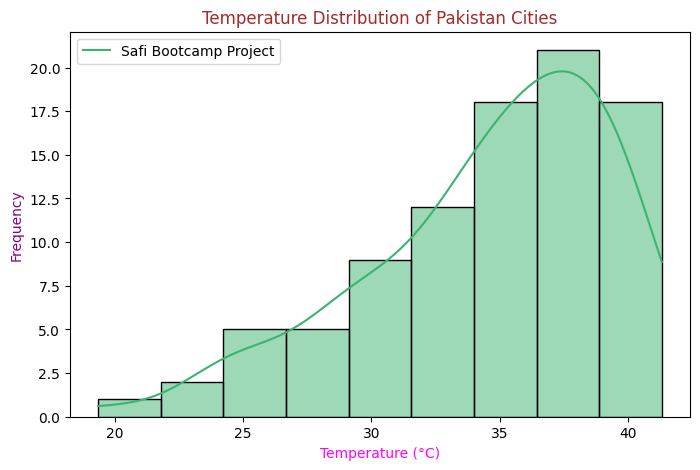

In [45]:
# Use histograms and boxplots to understand the distribution of variables like Temperature, Humidity, etc.

import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Temperature
plt.figure(figsize=(8, 5))  # Creates a new figure with specified size (8x5 inches)
sns.histplot(df['temperature'], kde=True, color='mediumseagreen')  # Adds a histogram with a custom color (skyblue)
plt.title('Temperature Distribution of Pakistan Cities', color='Brown')  # Sets a custom title color (darkblue)
plt.xlabel('Temperature (°C)', color='magenta')  # Sets custom color for x-axis label (green)
plt.ylabel('Frequency', color='purple')  # Sets custom color for y-axis label (purple)
plt.legend(['Safi Bootcamp Project'])  # Adds a legend
plt.show()

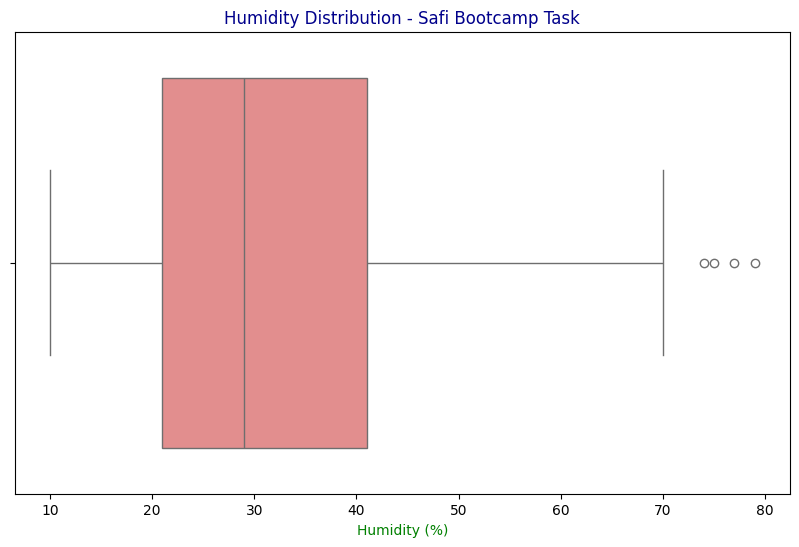

In [46]:
# Boxplot for Humidity with customizations
plt.figure(figsize=(10, 6))  # Creates a new figure for the plot with size 10x6 inches
sns.boxplot(x=df['humidity'], color='lightcoral')  # Custom color (lightcoral) for the boxplot
plt.title('Humidity Distribution - Safi Bootcamp Task', color='darkblue')  # Custom title with "Safi Bootcamp Task"
plt.xlabel('Humidity (%)', color='green')  # Custom x-axis label color (green)
plt.show()


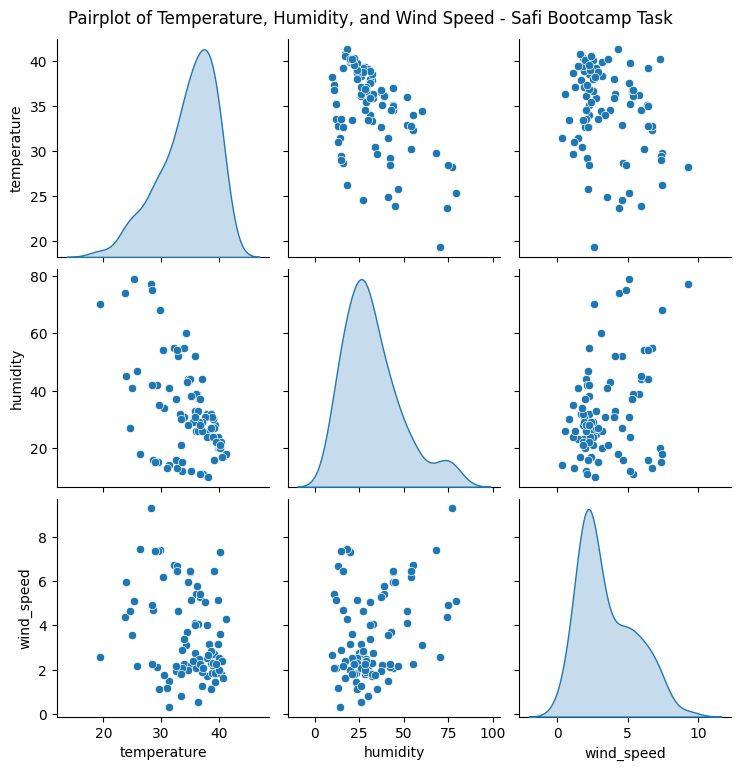

In [47]:
# Pairplot for Temperature, Humidity, and Wind Speed
sns.pairplot(df[['temperature', 'humidity', 'wind_speed']], kind='scatter', diag_kind='kde')
plt.suptitle('Pairplot of Temperature, Humidity, and Wind Speed - Safi Bootcamp Task', y=1.02)
plt.show()

# This pairplot visualizes relationships between temperature, humidity, and wind speed, showing scatter plots
# for their interactions and distribution using KDE plots.


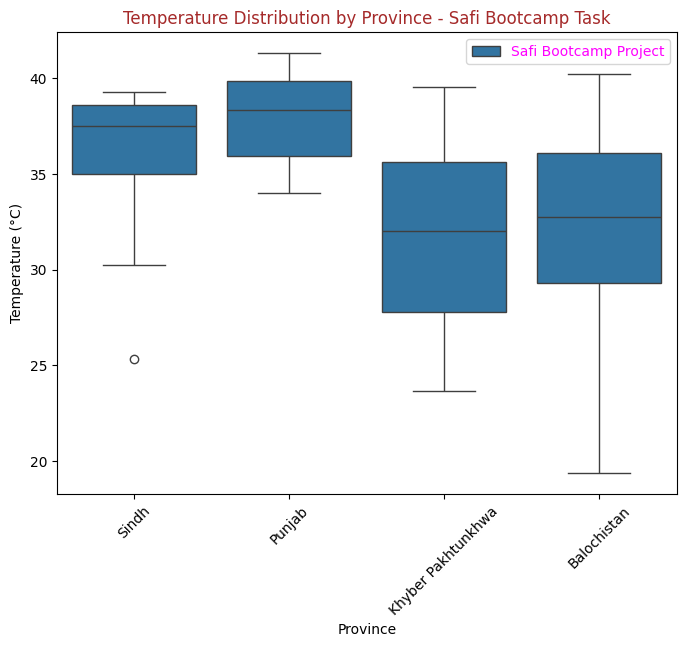

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Temperature by Province
plt.figure(figsize=(8, 6))  # Creates a figure
sns.boxplot(x='province', y='temperature', data=df)  # Creates boxplots for temperature by province
plt.title('Temperature Distribution by Province - Safi Bootcamp Task', color='brown')  # Adds a title
plt.xlabel('Province')  # X-axis label
plt.ylabel('Temperature (°C)')  # Y-axis label
plt.xticks(rotation=45)  # Rotates x-axis labels for readability
plt.legend(['Safi Bootcamp Project'], labelcolor='magenta')  # Adds a magenta-colored legend
plt.show()



2. For European visitors aged 40-80 suitable places to visit in Pakistan simialr to EU climate

<ipython-input-62-17f90054283d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_temp_by_province.values, y=avg_temp_by_province.index, palette='coolwarm')  # Colder areas in blue


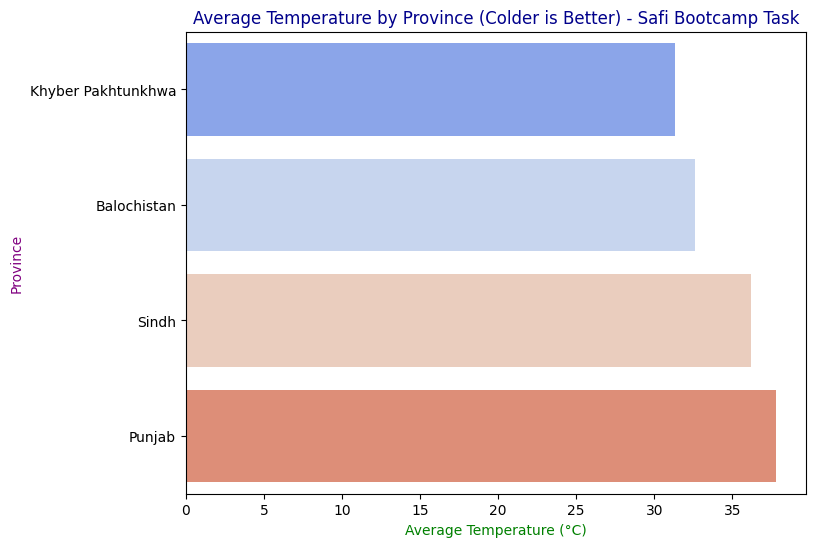

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average temperature by province
avg_temp_by_province = df.groupby('province')['temperature'].mean().sort_values()

# Bar plot to visualize average temperature by province
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_temp_by_province.values, y=avg_temp_by_province.index, palette='coolwarm')  # Colder areas in blue
plt.title('Average Temperature by Province (Colder is Better) - Safi Bootcamp Task', color='darkblue')
plt.xlabel('Average Temperature (°C)', color='green')
plt.ylabel('Province', color='purple')
plt.show()

# Bluer the area, Better for EU Vsitors to visit

3. Group and Compare Cities Based on Weather Conditions

In [63]:
# Group by City and Province, and calculate the mean for relevant columns
city_province_group = df.groupby(['province', 'city']).agg({
    'temperature': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',
    'cloudiness': 'mean'
}).reset_index()


# Display the grouped DataFrame
print(city_province_group)

       province                 city  temperature  humidity  wind_speed  \
0   Balochistan               Awaran        39.21      16.0        6.44   
1   Balochistan              Barkhan        32.63      16.0        2.18   
2   Balochistan               Chaman        32.74      13.0        6.70   
3   Balochistan            Dalbandin        37.27      11.0        2.09   
4   Balochistan           Dera Bugti        35.90      31.0        4.02   
..          ...                  ...          ...       ...         ...   
86        Sindh           Tando Adam        36.49      37.0        5.31   
87        Sindh       Tando Allahyar        36.23      39.0        5.78   
88        Sindh  Tando Muhammad Khan        34.93      44.0        6.45   
89        Sindh               Thatta        32.28      55.0        6.73   
90        Sindh              Umerkot        25.35      79.0        5.09   

    cloudiness  
0          0.0  
1          0.0  
2          0.0  
3          7.0  
4          1.0

In [78]:
# Sort by average temperature in ascending order to get colder areas
colder_cities = city_province_group.sort_values(by='temperature', ascending=True).head(20)

# Display the top 20 colder cities in DataFrame format
colder_cities_df = pd.DataFrame(colder_cities)
print(colder_cities_df)


              province        city  temperature  humidity  wind_speed  \
7          Balochistan         Hub        19.36      70.0        2.57   
29  Khyber Pakhtunkhwa       Hangu        23.65      74.0        4.38   
31  Khyber Pakhtunkhwa       Karak        23.87      45.0        5.96   
27  Khyber Pakhtunkhwa     Chitral        24.60      27.0        4.63   
43  Khyber Pakhtunkhwa   Upper Dir        24.87      41.0        3.56   
90               Sindh     Umerkot        25.35      79.0        5.09   
24  Khyber Pakhtunkhwa  Abbottabad        25.78      47.0        2.18   
9          Balochistan       Kalat        26.28      18.0        7.44   
17         Balochistan       Pasni        28.18      77.0        9.28   
35  Khyber Pakhtunkhwa    Mansehra        28.47      42.0        2.25   
8          Balochistan      Jiwani        28.49      75.0        4.90   
18         Balochistan      Quetta        28.64      16.0        4.68   
20         Balochistan       Surab        29.00    

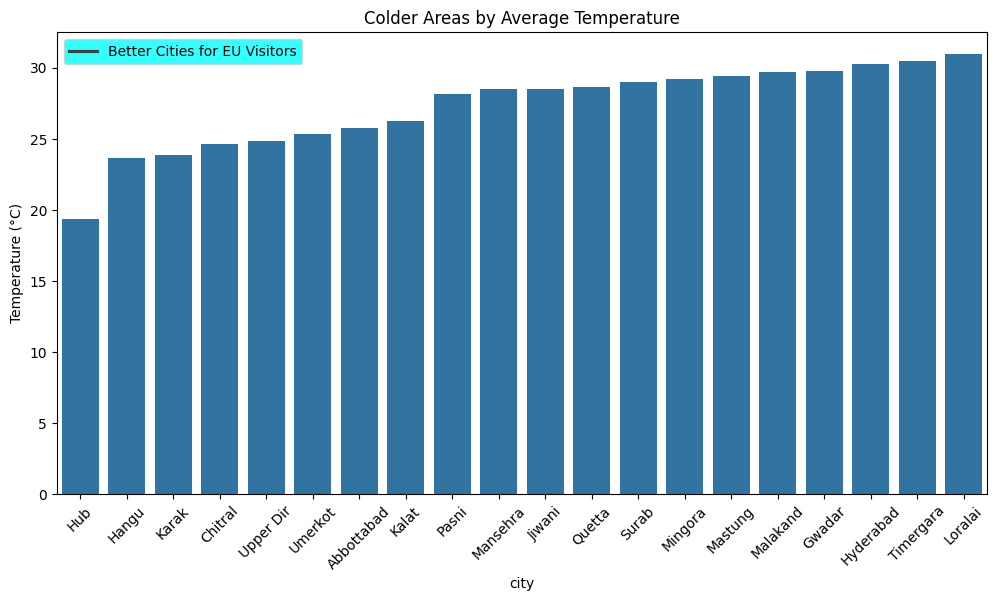

In [83]:
# Sort by average temperature in ascending order to get colder areas
colder_cities = city_province_group.sort_values(by='temperature', ascending=True).head(20)

# Barplot for Colder Areas by Temperature
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='temperature', data=colder_cities_df)
plt.title('Colder Areas by Average Temperature')
plt.xticks(rotation=45)
plt.ylabel('Temperature (°C)')
plt.legend(['Better Cities for EU Visitors'], loc='upper left', fontsize=10, facecolor='cyan')
plt.show()


4. Scatter Plot for Temperature vs Humidity


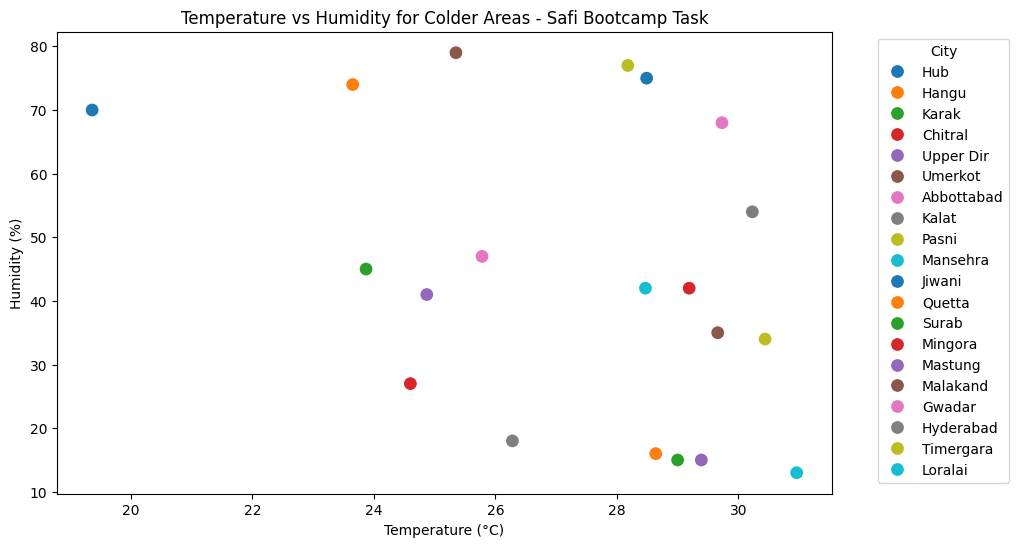

In [80]:
# Scatter Plot for Temperature vs Humidity for colder areas with colored markers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', data=colder_cities_df, hue='city', palette='tab10', s=100)

# Set the title and labels
plt.title('Temperature vs Humidity for Colder Areas - Safi Bootcamp Task')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')

# Show the plot
plt.legend(loc='best', bbox_to_anchor=(1.05, 1), title='City')  # Adjust legend to the right
plt.show()


In [89]:
# Extract weather description correctly from the API
desc = data['weather'][0]['description']

# Add it to your DataFrame when appending weather data
weather_data.append({
    'City': city,
    'Province': province,
    'Description': desc.capitalize(),
    # Other fields like temperature, humidity, etc.
})
# Check if 'description' exists in the DataFrame
print(colder_cities_df.columns)


Index(['province', 'city', 'temperature', 'humidity', 'wind_speed',
       'cloudiness'],
      dtype='object')


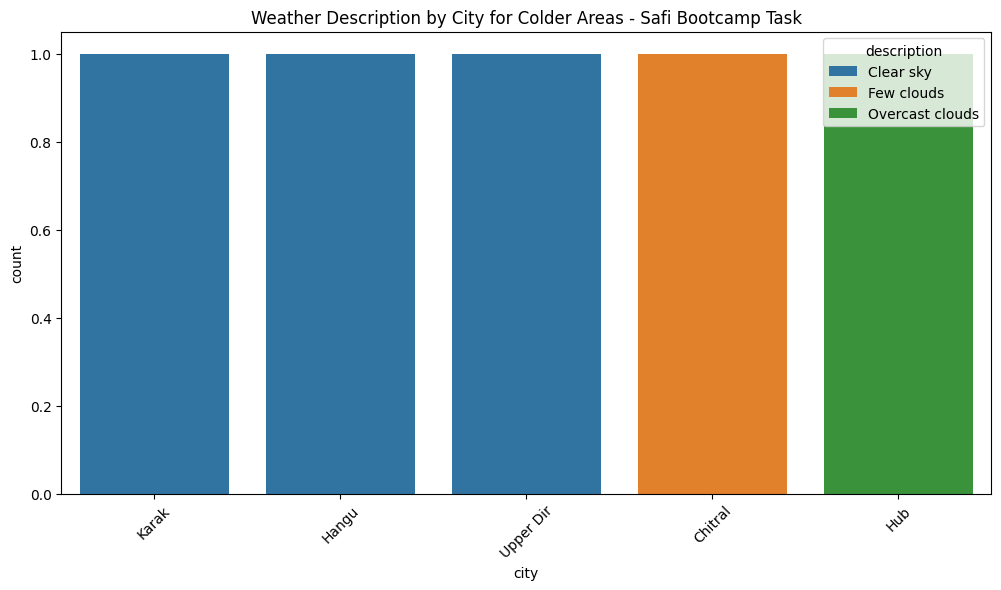

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter cities with temperature below or equal to 20°C to get colder areas
colder_cities_df = df[df['temperature'] <= 25]

# Ensure no missing descriptions
colder_cities_df = colder_cities_df.dropna(subset=['description'])

# Plot the count of weather descriptions by city for colder areas
plt.figure(figsize=(12, 6))
sns.countplot(x='city', hue='description', data=colder_cities_df)
plt.title('Weather Description by City for Colder Areas - Safi Bootcamp Task')
plt.xticks(rotation=45)  # Rotate city names for better readability
plt.show()


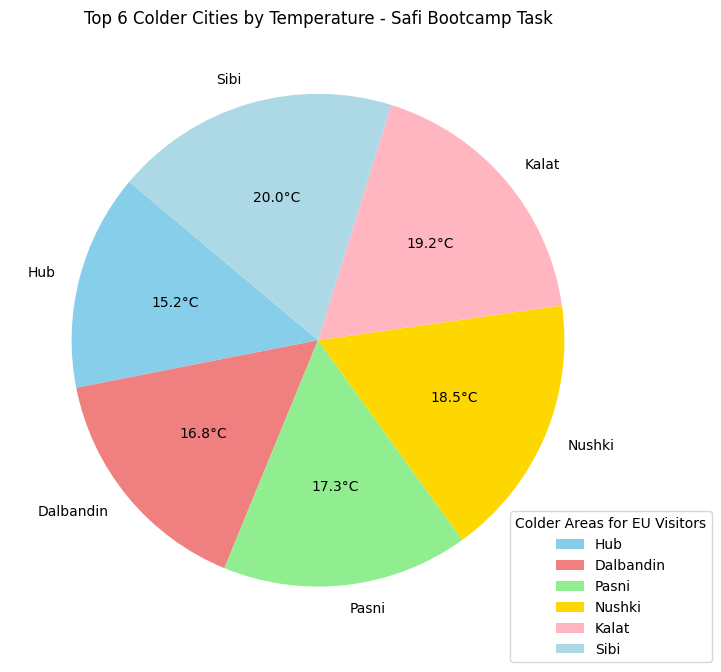

In [101]:
import matplotlib.pyplot as plt

# Data for top 6 colder cities and their respective temperatures
labels = ['Hub', 'Dalbandin', 'Pasni', 'Nushki', 'Kalat', 'Sibi']
temperatures = [15.2, 16.8, 17.3, 18.5, 19.2, 20.0]  # Replace these with actual colder temperatures

# Create a function to format the temperature values on the pie chart
def format_temp(value):
    total = sum(temperatures)
    temp = (value/100)*total
    return f'{temp:.1f}°C'

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(temperatures, labels=labels, autopct=format_temp, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink', 'lightblue'], startangle=140)
plt.title('Top 6 Colder Cities by Temperature - Safi Bootcamp Task')
plt.legend(title='Colder Areas for EU Visitors', loc='center left', bbox_to_anchor=(0.8, 0.1))

# Display the chart
plt.show()
